In [9]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
import numpy as np    
idx_3 = np.where(df.quality == 3)
idx_4 = np.where(df.quality == 4)
idx_5 = np.where(df.quality == 5)
idx_6 = np.where(df.quality == 6)
idx_7 = np.where(df.quality == 7)
idx_8 = np.where(df.quality == 8)

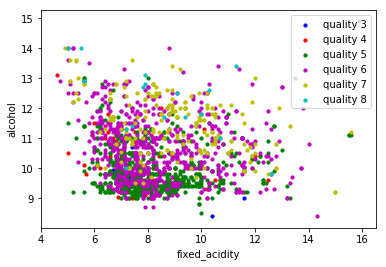

In [14]:
plt.scatter(df.iloc[idx_3].fixed_acidity, df.iloc[idx_3].alcohol, s=10, c='b', marker="o", label='quality 3')
plt.scatter(df.iloc[idx_4].fixed_acidity, df.iloc[idx_4].alcohol, s=10, c='r', marker="o", label='quality 4')
plt.scatter(df.iloc[idx_5].fixed_acidity, df.iloc[idx_5].alcohol, s=10, c='g', marker="o", label='quality 5')
plt.scatter(df.iloc[idx_6].fixed_acidity, df.iloc[idx_6].alcohol, s=10, c='m', marker="o", label='quality 6')
plt.scatter(df.iloc[idx_7].fixed_acidity, df.iloc[idx_7].alcohol, s=10, c='y', marker="o", label='quality 7')
plt.scatter(df.iloc[idx_8].fixed_acidity, df.iloc[idx_8].alcohol, s=10, c='c', marker="o", label='quality 8')
plt.ylabel('alcohol')
plt.xlabel('fixed_acidity')
plt.legend()
plt.show()

In [15]:
X=df.iloc[:,0:11]
X[0:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
y=df.iloc[:,11]
y[0:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [17]:
#normalising
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [18]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


In [19]:
#classification
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k=12
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [21]:
yhat=neigh.predict(X_test)

In [22]:
#evaluation
from sklearn import metrics
print("Train set acc: ",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set acc: ",metrics.accuracy_score(y_test,yhat))

Train set acc:  0.6559812353401094
Test set acc:  0.596875


In [23]:
#evaluation
from sklearn import metrics
print(metrics.accuracy_score(y_train,neigh.predict(X_train)),',',metrics.accuracy_score(y_test,yhat))

0.6559812353401094 , 0.596875


In [24]:
#we run the Classifier for k values ranging from 2-20 and
#store in the 'accuracies.csv'

In [25]:
df2=pd.read_csv("accuracies.csv")

In [26]:
df2.head()

,k,train_accuracy,test_accuracy
0,2,0.802189,0.590625
1,3,0.773260,0.587500
2,4,0.724003,0.575000
3,5,0.702893,0.578125
4,6,0.686474,0.587500


Text(0,0.5,'Train set accuracy')

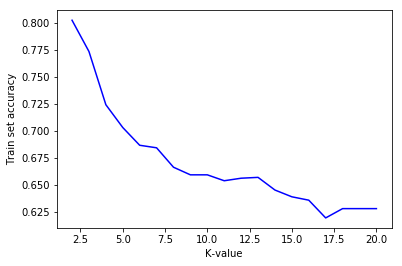

In [27]:
#train_accuracy_plot
xval=df2[['k']]
yval=df2[['train_accuracy']]
plt.plot(xval,yval,color='blue')
plt.xlabel('K-value')
plt.ylabel('Train set accuracy')

Text(0,0.5,'Test set accuracy')

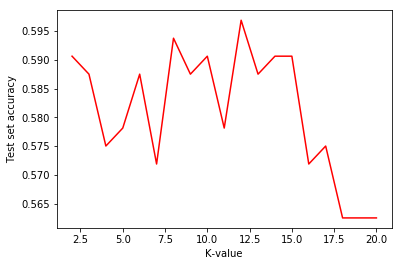

In [28]:
#test_accuracy_plot
xval2=df2[['k']]
yval2=df2[['test_accuracy']]
plt.plot(xval2,yval2,color='red')
plt.xlabel('K-value')
plt.ylabel('Test set accuracy')

In [29]:
df2.describe()

,k,train_accuracy,test_accuracy
count,19.000000,19.000000,19.000000
mean,11.000000,0.670837,0.581086
std,5.627314,0.049538,0.011145
min,2.000000,0.619234,0.562500
25%,6.500000,0.637217,0.573438
50%,11.000000,0.656763,0.587500
75%,15.500000,0.685301,0.590625
max,20.000000,0.802189,0.596875


In [30]:
#test_accuracy is maximum at k=12
#so, at k=12 we get the better accuracy for the test data

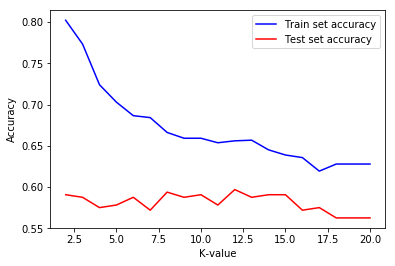

In [34]:
#combined graph
xval=df2[['k']]
yval=df2[['train_accuracy']]
plt.plot(xval,yval,color='blue',label='Train set accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
yval2=df2[['test_accuracy']]
plt.plot(xval,yval2,color='red',label='Test set accuracy')
plt.legend()